In [2]:
# #Importing python libraries downloaded from the internet and those saved locally
# import serial 
# from serial.tools import list_ports
os.chdir('/Users/Orlando/Documents/Github_clones/duckbot/notebooks') #Path where utils folder is stored

import yaml
import matplotlib
matplotlib.use('TkAgg') #This is a specific back end of matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2 as cv2
import time
import pandas as pd
import glob
import json
import datetime
from datetime import date
import ipywidgets as widgets
import threading


print(os.path.abspath(os.curdir))
# from utils.MachineUtils import * #Local library
# from utils.CameraUtils import * #Local library. #Note that this library requirs a package that can only be installed on raspbery pi. 
import utils.PlatePositionUtils as pp #Local library
# import utils.ImageCaptureUtils as im
import utils.PlatePositionUtils as pp #Local library

%matplotlib inline
import re
import PIL as Image
import matplotlib.image as mpimg



/Users/Orlando/Documents/Github_clones/duckbot/notebooks


In [3]:
#Directory that hosts experiment set up file
expt_setup_parent_dir = "/Users/Orlando/Documents/Github_clones/duckbot/test_expt_setupfiles/"
expt_setup_dir = 'TestDriveExpt_1_08032022/'
# '/home/pi/duckbot/test_expt_setupfiles/TestDriveExpt_1_08032022/'
expt_setup_path = expt_setup_parent_dir + expt_setup_dir


#Experimental set up file name, including .json
expt_setup_filename = 'TestDriveExpt_1_08032022.json'

#Host directory that you want to host the folder with your image files. End with forward slash
data_host_dir_path = "/Users/Orlando/Documents/Github_clones/duckbot/test_data/"
# '/home/pi/Documents/Data/'

#Name you want to use for the folder with your image files
data_dir = 'TestDriveExpt_1_08032022'
expt_name = 'TestDriveExpt_1_08032022' #Will be used as prefix for file names

#Where data will be saved
output_data_dir = data_host_dir_path + data_dir  

isExist = os.path.exists(output_data_dir)
if not isExist:
  # Create a new directory because it does not exist 
    os.makedirs(output_data_dir)
    print("The new directory is created!")
    
print("Image files will be saved to:")
print(output_data_dir)

Image files will be saved to:
/Users/Orlando/Documents/Github_clones/duckbot/test_data/TestDriveExpt_1_08032022


In [4]:
df_with_well_coords = pp.add_well_coords_to_df_from_file(expt_setup_path, expt_setup_filename)

In [6]:
plates = list(np.unique(df_with_well_coords['Plate']))
plates = [int(x[-1]) for x in plates]

In [7]:
c_num = 6 #How many columns per plate
r_num = 4 #How many rows per plate
date_today = "2022-08-09"

row_dict ={"A" : 1, "B" :2, "C": 3, "D": 4, "E" : 5, "F" : 6}

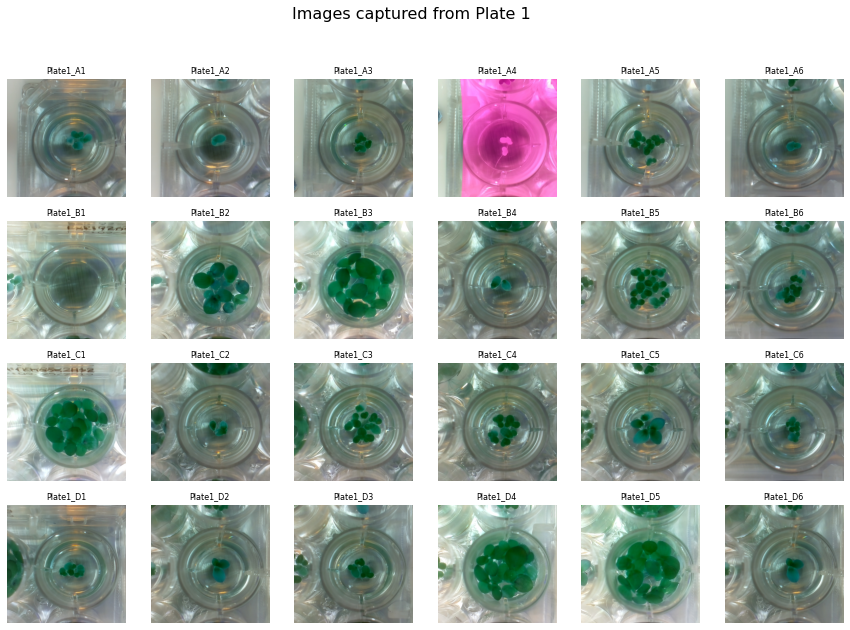

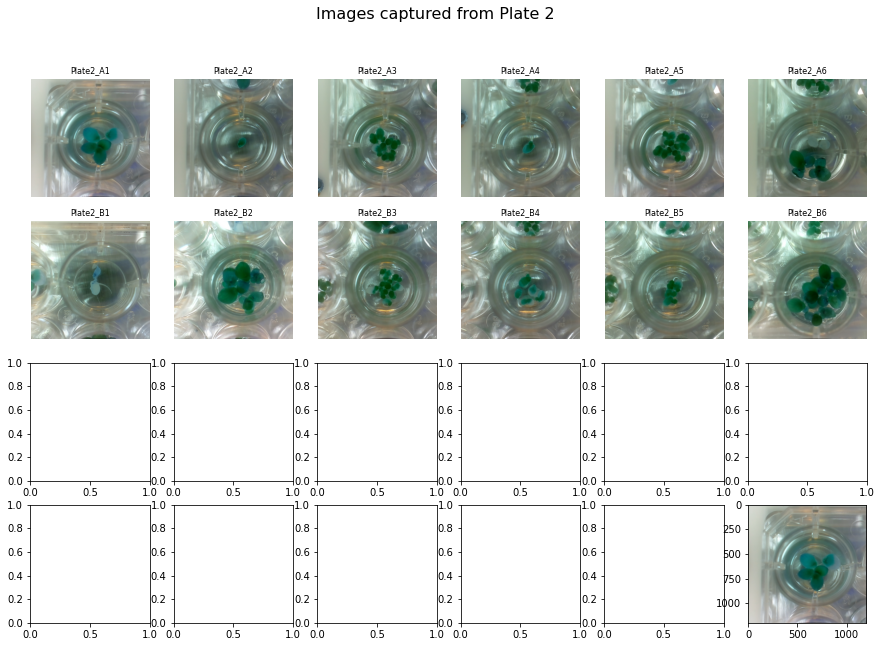

In [8]:
# using the variable axs for multiple Axe

for p in plates:
    fig, axs = plt.subplots(r_num, c_num, figsize=(15, 10))
    plt.suptitle(f"Images captured from Plate {p}", fontsize = 16)
    os.chdir(output_data_dir)
    for file in os.listdir(output_data_dir):
        if ".jpg" and date_today in file:
            well = re.search("well..", file).group(0)[-2:] #Find the pattern, use 'group(0)'' to pull string from match object and then slice to get desired part
            plate = re.search("Plate\_.",file).group(0)[-1]
            well = well[-2:]
            row = row_dict[well[0]] - 1 #Pull column number from dictionary above. Adjust to start at 0 instead of 1
            column = int(well[1]) - 1
            if plate == str(p):
                img = mpimg.imread(file)
                plt.imshow(img)
#                 plt.axis('off')
                axs[row, int(column)].axis('off')
                axs[row, int(column)].imshow(img)
                axs[row, int(column)].set_title(f"Plate{p}_{well}", fontsize = 8)
